FIRST IMPORT THE LIBRARIES THEN
SEED


In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
data={
    'feature1':np.random.uniform(1,10,100),
    'feature2':np.random.uniform(5,15,100),
    'feature3':np.random.uniform(10,20,100),
    'class':np.random.choice([0,1],size=100),
}

df=pd.DataFrame(data)
df.loc[df.sample(frac=0.1).index, 'feature1']=np.nan
df.loc[df.sample(frac=0.1).index, 'feature2']=np.nan
df.loc[df.sample(frac=0.1).index, 'feature3']=np.nan

print(df.head)


<bound method NDFrame.head of     feature1   feature2   feature3  class
0   4.370861   5.314292  16.420316      0
1   9.556429        NaN  10.841400      1
2   7.587945   8.143560  11.616287      1
3   6.387926  10.085707  18.985542      1
4        NaN  14.075665  16.064291      0
..       ...        ...        ...    ...
95  5.444160   8.492096  15.222433      1
96  5.704595        NaN  17.699936      0
97       NaN  13.971103  12.158210      1
98  1.228772        NaN  16.228905      1
99  1.971023  12.798755  10.853475      0

[100 rows x 4 columns]>


In [3]:
print(df.isnull().sum())

feature1    10
feature2    10
feature3    10
class        0
dtype: int64


In [7]:
df_imput=df.fillna(df.mean())
print(df.imput.head)

<bound method NDFrame.head of     feature1   feature2   feature3  class
0   4.370861   5.314292  16.420316      0
1   9.556429   9.856326  10.841400      1
2   7.587945   8.143560  11.616287      1
3   6.387926  10.085707  18.985542      1
4   5.251487  14.075665  16.064291      0
..       ...        ...        ...    ...
95  5.444160   8.492096  15.222433      1
96  5.704595   9.856326  17.699936      0
97  5.251487  13.971103  12.158210      1
98  1.228772   9.856326  16.228905      1
99  1.971023  12.798755  10.853475      0

[100 rows x 4 columns]>


In [8]:
from sklearn.preprocessing import StandardScaler

numi_col=['feature1','feature2','feature3']
df_numi=df_imput[numi_col]

scaler=StandardScaler()
df_stand=pd.DataFrame(scaler.fit_transform(df_numi),columns=numi_col)
print(df_stand.head())

       feature1      feature2  feature3
0 -3.443709e-01 -1.642334e+00  0.500463
1  1.683459e+00 -1.196284e-17 -1.499356
2  9.136781e-01 -6.193114e-01 -1.221590
3  4.444076e-01  8.294096e-02  1.419994
4 -6.501543e-18  1.525652e+00  0.372842


<bound method NDFrame.head of          PC1       PC2
0   1.530138  0.219098
1  -1.452838  1.591841
2  -0.663796  1.070606
3   0.845755  0.388006
4  -0.754237 -0.507452
..       ...       ...
95  0.361883  0.234651
96  0.637306  0.164667
97 -1.719590 -0.491291
98  0.671904 -1.484983
99 -1.468836 -1.559430

[100 rows x 2 columns]>


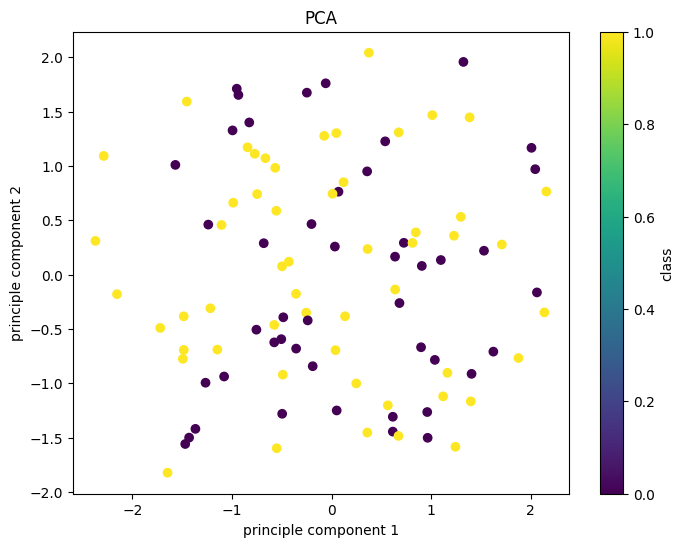

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df_stand),columns=['PC1','PC2'])
print(df_pca.head)

plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'],df_pca['PC2'],c=df['class'], cmap='viridis')
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.colorbar(label='class')
plt.title('PCA')
plt.show()

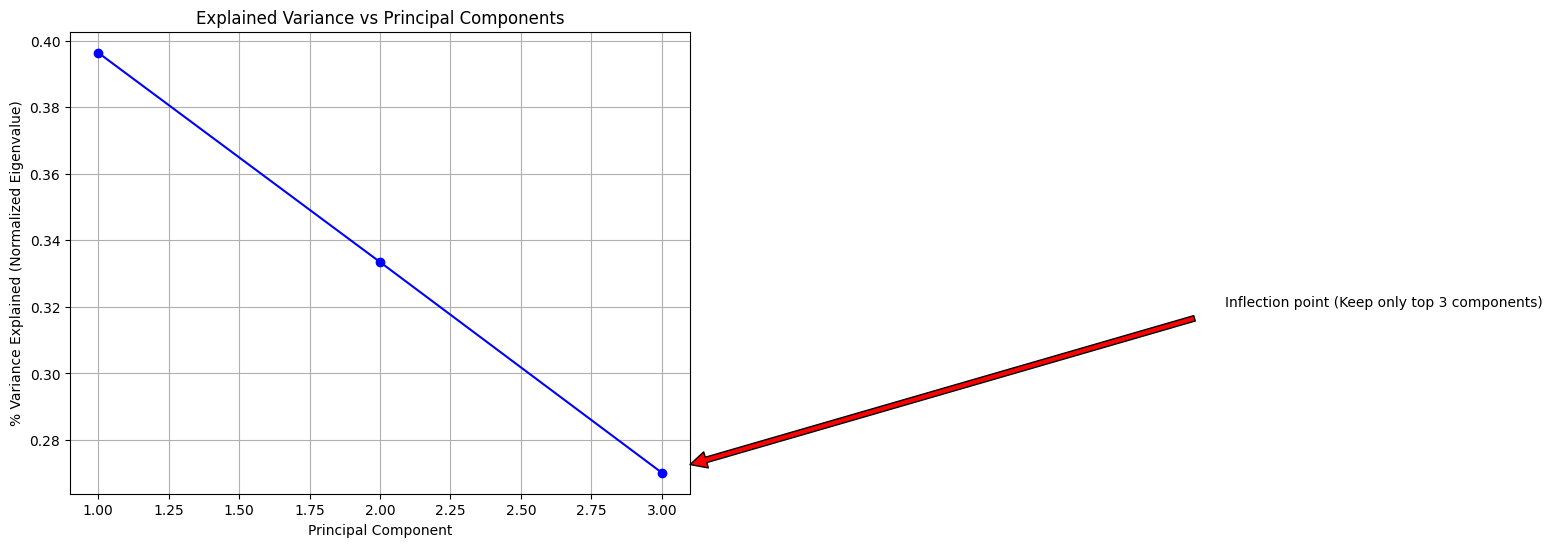


Cumulative explained variance for each component:
 [0.39637291 0.72983695 1.        ]

Suggested number of components to retain: 3


In [25]:
# Apply PCA without specifying the number of components
pca_full = PCA()
pca_full.fit(df_stand)
# Get explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
# Plot the explained variance for each component
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o',linestyle='-',color='blue')
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained (Normalized Eigenvalue)')
plt.title('Explained Variance vs Principal Components')
# Add an annotation for the inflection point (based on visual analysis)
plt.annotate('Inflection point (Keep only top 3 components)',
xy=(3, explained_variance[2]),
xytext=(5, explained_variance[2]+0.05),
arrowprops=dict(facecolor='red', shrink=0.05))
plt.grid(True)
plt.show()
# Print the cumulative explained variance for better interpretation
cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative explained variance for each component:\n", cumulative_variance)
# Suggest the number of components explaining at least 90% of the variance
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nSuggested number of components to retain: {optimal_components}")